# What do partitioned circles look like?

In [1]:
import sys
sys.path.append("../py")

import matplotlib.pyplot as plt
import numpy as np
import math

import coordpar.exclusion as ex
import coordpar.euclid as euclid
import coordpar.partition as par
from coordpar.diversity_problem import DiversityProblem

In [2]:
np.set_printoptions(suppress=True)
precision = 1000
savefig = True
fig_directory = "../fig"

In [3]:
n = 51
p = 5
s = 10

In [4]:
np.random.seed(20)
dp = DiversityProblem.random(n,p,s)
y = ex.get_heur_sol(dp)

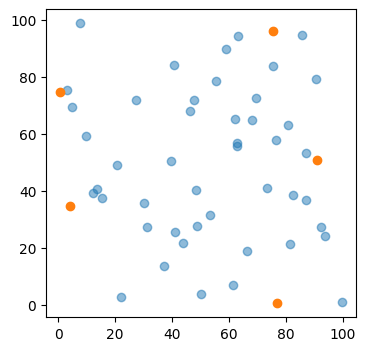

0.014529215941695827


In [5]:
fig,axes = plt.subplots(1,figsize=(4,4))
axes.plot(dp.locations[y==0,0],dp.locations[y==0,1],ls="",marker="o",alpha=0.5)
axes.plot(dp.locations[y==1,0],dp.locations[y==1,1],ls="",marker="o")
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_pre_partition.pdf")
plt.show()
print(ex.get_proportion_solutions_removed(dp, y))

## Partition and Visualise

In [6]:
locations, evals = euclid.gram_recovery(dp.edm, pre_normalize=True, return_evals=True)

In [7]:
evals

array([310.43335706, 271.4868813 , 249.63652854, 219.65312719,
       193.01862256, 191.2768152 , 163.02384001, 145.02090137,
       123.78139345, 110.18977991,  54.48097644,  48.03041161,
        45.04837119,  44.4994385 ,  43.19251869,  42.88197753,
        39.84014638,  39.57517   ,  38.88632145,  38.64606317,
        37.32322262,  36.20584473,  36.03619576,  34.80541523,
        32.88272522,  32.47950613,  32.25178481,  31.27825775,
        30.55597018,  29.39594884,  28.77110038,  28.07005455,
        27.9348397 ,  27.49813466,  27.38353409,  26.5714253 ,
        25.98099293,  25.30846771,  24.65145086,  24.30543375,
        23.79379026,  23.57282702,  22.77049858,  22.47744831,
        21.70009551,  21.59147786,  20.72858555,  20.16252154,
        19.45731632,  18.39631596])

In [8]:
evals/evals.sum()

array([0.09620042, 0.08413127, 0.07736005, 0.06806847, 0.05981468,
       0.05927491, 0.05051958, 0.04494063, 0.03835871, 0.03414679,
       0.01688315, 0.01488418, 0.01396007, 0.01378996, 0.01338496,
       0.01328873, 0.01234609, 0.01226398, 0.01205051, 0.01197606,
       0.01156612, 0.01121986, 0.01116728, 0.01078588, 0.01019005,
       0.0100651 , 0.00999453, 0.00969284, 0.00946901, 0.00910953,
       0.0089159 , 0.00869865, 0.00865675, 0.00852142, 0.0084859 ,
       0.00823424, 0.00805127, 0.00784286, 0.00763926, 0.00753203,
       0.00737348, 0.007305  , 0.00705637, 0.00696555, 0.00672466,
       0.006691  , 0.0064236 , 0.00624818, 0.00602964, 0.00570085])

In [9]:
partitions = par.from_strategy("sssv",int(n/2),len(evals),evals)
locations = [locations[:,coords] for coords in partitions]

Number coordinates in each partition

In [10]:
print([loc.shape[1] for loc in locations])

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


Plots of points on squared distances

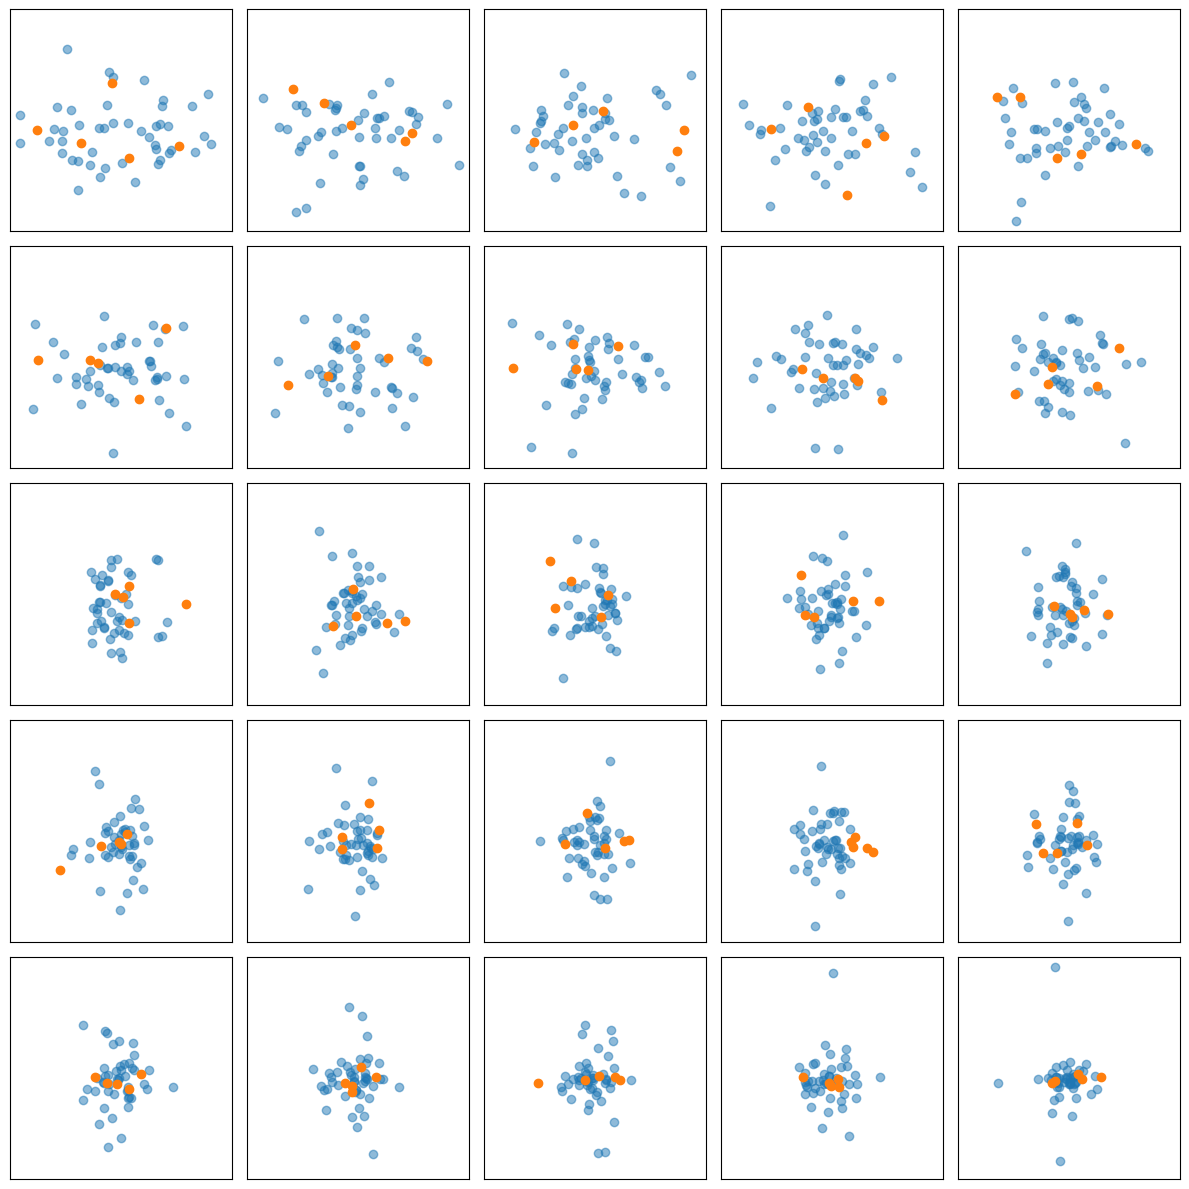

: 

In [11]:
per_row=5
fig,axes = plt.subplots(math.ceil(len(locations)/per_row),per_row,figsize=(12,12),sharex=True,sharey=True)
k = 0
for i in range(math.ceil(len(locations)/per_row)):
    for j in range(per_row):
        if k<len(locations):
            loc = locations[k]
            axes[i,j].plot(loc[y==0,0],loc[y==0,1],ls="",marker="o",alpha=0.5)
            axes[i,j].plot(loc[y==1,0],loc[y==1,1],ls="",marker="o")
            axes[i,j].set_xticks([])
            axes[i,j].set_yticks([])
            k+=1
plt.tight_layout()
plt.show()

In [12]:
per_row=5
fig,axes = plt.subplots(math.ceil(len(locations)/per_row),per_row,figsize=(12,12),sharex=True,sharey=True)

partitioned_zones = []

k = 0
for i in range(math.ceil(len(locations)/per_row)):
    for j in range(per_row):
        if k<len(locations):
            loc = locations[k]

            _dp = DiversityProblem()
            _dp.locations = locations[k]
            _dp.n = dp.n
            _dp.p = dp.p
            _dp.s = dp.s
            _dp._build_edm(squared=True)

            X, Y, Z = ex.get_exclusion_zones(_dp, y, squared=True, space_increase=20)
            removed = ex.get_proportion_solutions_removed(_dp, y)
            partitioned_zones.append((removed,X,Y,Z))
            k+=1

partitioned_zones.sort(key= lambda x: x[0])

k = 0
for i in range(math.ceil(len(locations)/per_row)):
    for j in range(per_row):
        if k<len(locations):
            removed, X, Y, Z = partitioned_zones[k]
            ex.plot_zones_onto_axes(axes[i,j],y,X,Y,Z,_dp)

            axes[i,j].annotate(f"{k+1}", 
                xy=(0.02, 0.02), xycoords='axes fraction', 
                textcoords='axes fraction', ha='left', va='bottom', 
                fontsize=14
            )

            removed = ex.get_proportion_solutions_removed(_dp, y)
            axes[i,j].annotate(f"{removed*100:.2f}%", 
                xy=(1-0.02, 0.02), xycoords='axes fraction', 
                textcoords='axes fraction', ha='right', va='bottom', 
                fontsize=14
            )

            axes[i,j].label_outer()
            k+=1


lim = (locations[0][:,0].min()-0.4,locations[0][:,0].max()+0.4)
axes[0,0].set_xlim(lim)
axes[0,0].set_ylim(lim)
plt.tight_layout()
if savefig: plt.savefig(f"{fig_directory}/exclusion_zones_demo_partitioned.pdf")
plt.show()